# Twitter Sentiment Analysis Project

## Description
This project involves performing sentiment analysis on Twitter data to analyze the sentiment expressed in tweets. The goal is to gain insights into public opinion, track sentiment trends, and understand the overall sentiment towards specific topics, events, or brands.

The project can be divided into the following steps:

1. **Data Collection**: Utilize the Twitter dataset

2. **Data Preprocessing**: Clean and preprocess the collected tweet data by removing noise, special characters, URLs, and hashtags. Perform text normalization techniques such as tokenization, removing stop words, and stemming or lemmatization to prepare the data for sentiment analysis.

3. **Sentiment Analysis**: Apply sentiment analysis techniques to determine the sentiment polarity of the tweets. This can involve using pre-trained sentiment analysis models or training your own models on labeled data. Classify the tweets as positive, negative, or neutral sentiment.

4. **Visualization and Analysis**: Visualize the sentiment analysis results using appropriate charts, graphs, or word clouds. Analyze the sentiment distribution, track sentiment trends over time, or compare sentiment between different topics or brands. Draw meaningful insights from the analysis.

5. **Interpretation and Reporting**: Summarize the key findings and insights from the sentiment analysis. Provide a detailed report or presentation that outlines the project methodology, the sentiment analysis approach used, and the implications of the sentiment patterns discovered.

**Note**: When working with Twitter data, it is important to comply with Twitter's terms of service, privacy policies, and any applicable data protection regulations. Ensure that you are obtaining data legally and adhere to ethical guidelines, including user consent and data anonymization when necessary.


# About Dataset
## Twitter Sentiment Analysis Dataset
### Overview

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.
### Usage

Please use twitter_training.csv as the training set and twitter_validation.csv as the validation set. Top 1 classification accuracy is used as the metric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
train_df = pd.read_csv('./data/twitter_training.csv', header= None)
train_df.columns = ['id','entity','sentiment','message']
test_df = pd.read_csv('./data/twitter_validation.csv', header= None)
test_df.columns = ['id','entity','sentiment','message']

In [5]:
df = pd.concat([train_df, test_df])
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         75682 non-null  int64 
 1   entity     75682 non-null  object
 2   sentiment  75682 non-null  object
 3   message    74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [7]:
df.describe()

,id
count,75682.000000
mean,6432.579583
std,3740.243463
min,1.000000
25%,3196.000000
50%,6423.000000
75%,9602.000000
max,13200.000000


In [8]:
df['sentiment'].value_counts()

Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: sentiment, dtype: int64

<AxesSubplot: >

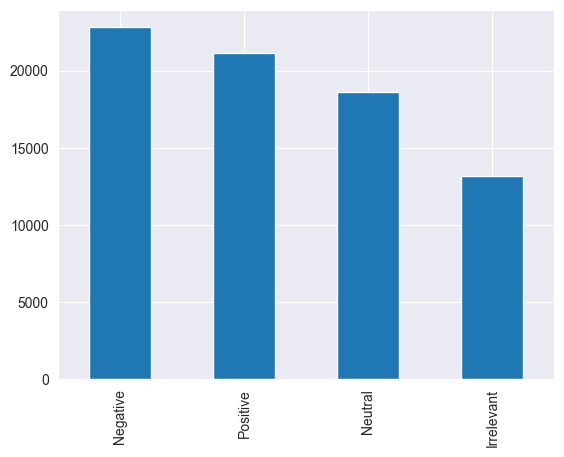

In [9]:
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='sentiment'>

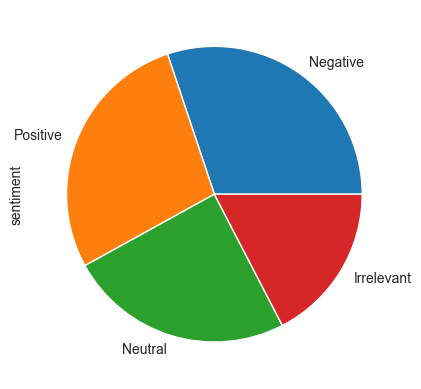

In [10]:
df['sentiment'].value_counts().plot(kind='pie')

<AxesSubplot: xlabel='text_length', ylabel='Density'>

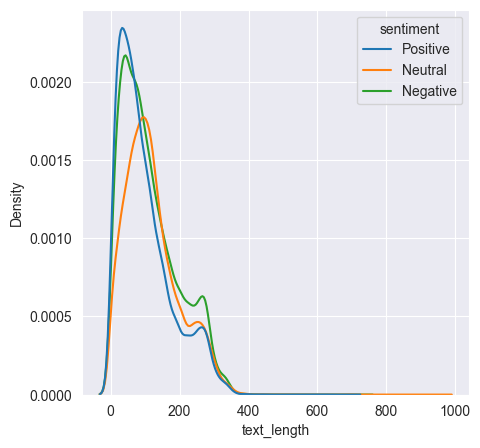

In [23]:
# Plotting the distribution of the length of messages
df["text_length"] = df["message"].apply(len)
fig, ax = plt.subplots(figsize=(5, 5))
sns.kdeplot(data= df, x= 'text_length', ax= ax, hue = 'sentiment')

In [24]:
# Drop the text_length column
df.drop('text_length', axis=1, inplace=True)

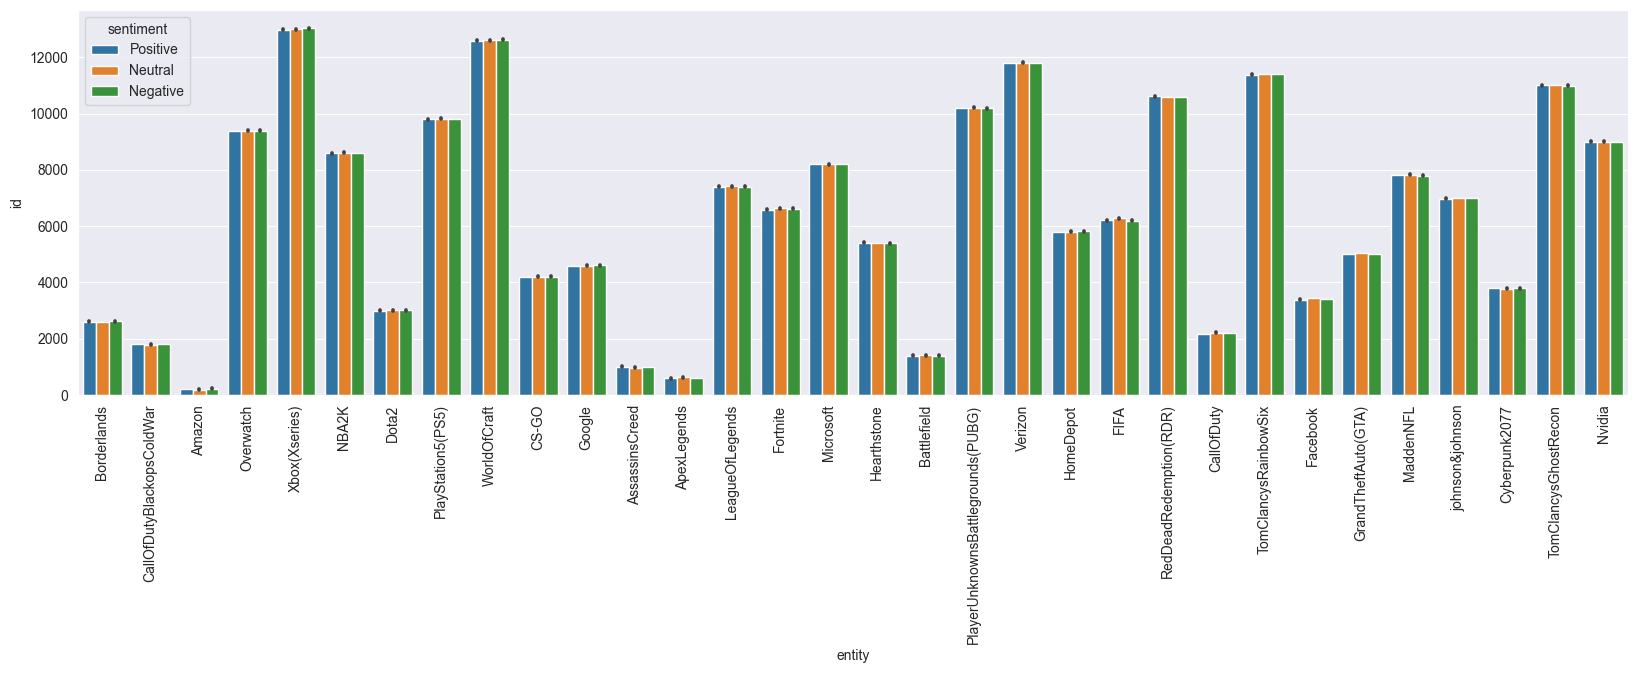

In [30]:
# Plotting the number of messages for each entity
plt.figure(figsize=(20, 5))
sns.barplot(x= 'entity', y= 'id', hue= 'sentiment', data= df)
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing


In [31]:
# Drop irrelevant sentiment
df = df[df['sentiment'] != 'Irrelevant']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59515 entries, 0 to 991
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59515 non-null  int64 
 1   entity     59515 non-null  object
 2   sentiment  59515 non-null  object
 3   message    59515 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [32]:
df['sentiment'].value_counts()

Negative    21790
Positive    19846
Neutral     17879
Name: sentiment, dtype: int64

In [33]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59515 entries, 0 to 991
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59515 non-null  int64 
 1   entity     59515 non-null  object
 2   sentiment  59515 non-null  object
 3   message    59515 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [34]:
# Check for null values
df.isnull().sum()

id           0
entity       0
sentiment    0
message      0
dtype: int64

In [35]:
# Drop null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59515 entries, 0 to 991
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59515 non-null  int64 
 1   entity     59515 non-null  object
 2   sentiment  59515 non-null  object
 3   message    59515 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [36]:
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [37]:
# Remove special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text
df['message'] = df['message'].apply(remove_special_characters)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [38]:
# Replace positive, negative  and neutral sentiment with 1,-1 and 0 respectively
df['sentiment'] = df['sentiment'].replace({'Positive':1, 'Negative':-1, 'Neutral':0})
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you all
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...


In [39]:
# Remove stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    tokens = text.split()
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['message'] = df['message'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wmigu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,entity,sentiment,message
0,2401,Borderlands,1,im getting borderlands murder
1,2401,Borderlands,1,I coming borders I kill
2,2401,Borderlands,1,im getting borderlands kill
3,2401,Borderlands,1,im coming borderlands murder
4,2401,Borderlands,1,im getting borderlands 2 murder


In [40]:
# Cleaning and removing punctuations
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['message'] = df['message'].apply(clean_text)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,im getting borderlands murder
1,2401,Borderlands,1,i coming borders i kill
2,2401,Borderlands,1,im getting borderlands kill
3,2401,Borderlands,1,im coming borderlands murder
4,2401,Borderlands,1,im getting borderlands 2 murder


In [41]:
# Removing the shorter words
def remove_short_words(text):
    tokens = text.split()
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if len(token) > 2]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['message'] = df['message'].apply(remove_short_words)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,getting borderlands murder
1,2401,Borderlands,1,coming borders kill
2,2401,Borderlands,1,getting borderlands kill
3,2401,Borderlands,1,coming borderlands murder
4,2401,Borderlands,1,getting borderlands murder


In [45]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(text):
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens]
    filtered_text = ' '.join(tokens)
    return filtered_text

df['message'] = df['message'].apply(stemming)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,get borderland kill
3,2401,Borderlands,1,come borderland murder
4,2401,Borderlands,1,get borderland murder


In [46]:
# Lemmatization
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_text = ' '.join(tokens)
    return filtered_text

df['message'] = df['message'].apply(lemmatization)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wmigu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,id,entity,sentiment,message
0,2401,Borderlands,1,get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,get borderland kill
3,2401,Borderlands,1,come borderland murder
4,2401,Borderlands,1,get borderland murder


In [47]:
# Tokenization
from nltk.tokenize import word_tokenize
df['message'] = df['message'].apply(word_tokenize)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,"[get, borderland, murder]"
1,2401,Borderlands,1,"[come, border, kill]"
2,2401,Borderlands,1,"[get, borderland, kill]"
3,2401,Borderlands,1,"[come, borderland, murder]"
4,2401,Borderlands,1,"[get, borderland, murder]"


In [48]:
# Joining the tokens
def join_tokens(tokens):
    text = ' '.join(tokens)
    return text

df['message'] = df['message'].apply(join_tokens)
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,get borderland kill
3,2401,Borderlands,1,come borderland murder
4,2401,Borderlands,1,get borderland murder


# WordCloud

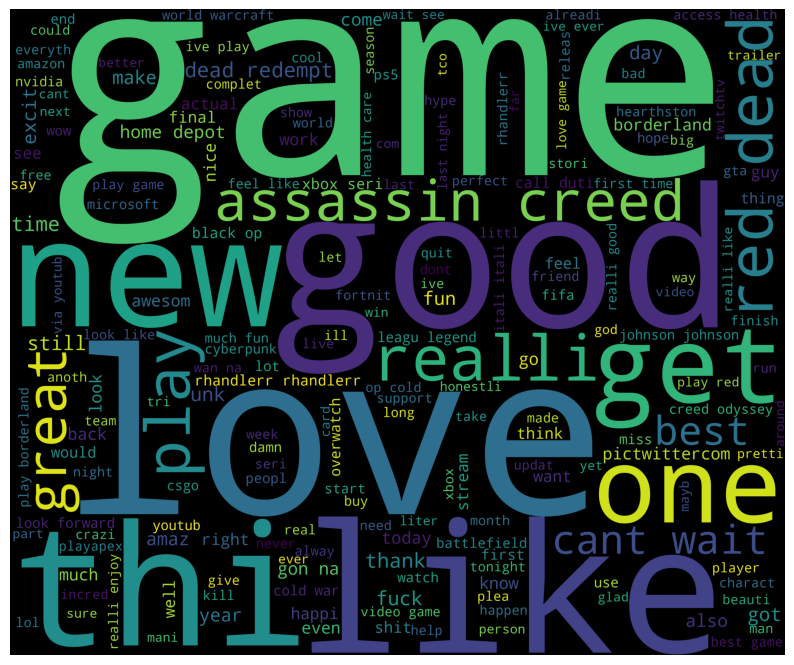

In [50]:
from wordcloud import WordCloud

STOPWORDS = set(stopwords)

# Generate wordcloud for positive sentiment
plt.figure(figsize=(10,10))
df_pos = df[df['sentiment']==1]
words = ' '.join(df_pos['message'])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word != 'RT'
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

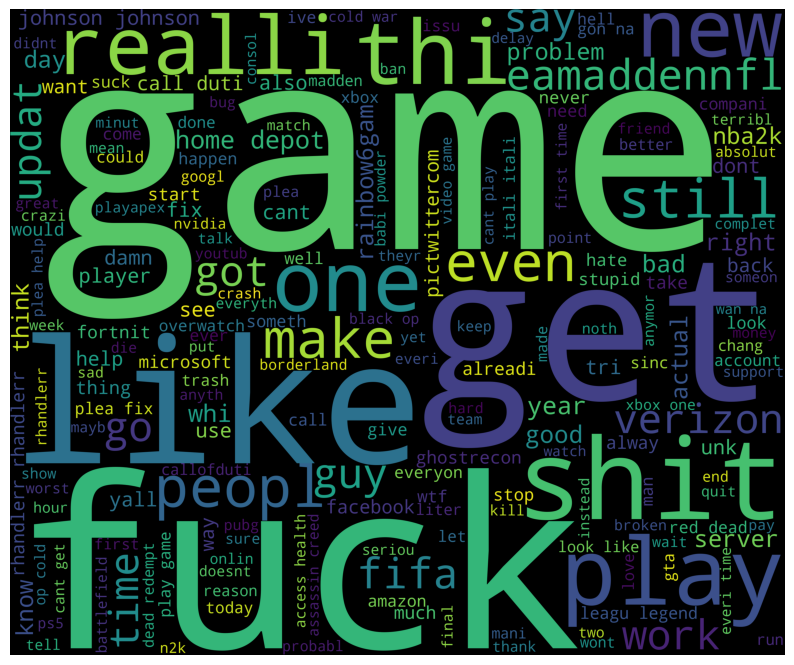

In [51]:
# Generate wordcloud for negative sentiment
plt.figure(figsize=(10,10))

df_neg = df[df['sentiment']==-1]
words = ' '.join(df_neg['message'])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word != 'RT'
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=3000,
                        height=2500
                         ).generate(cleaned_word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

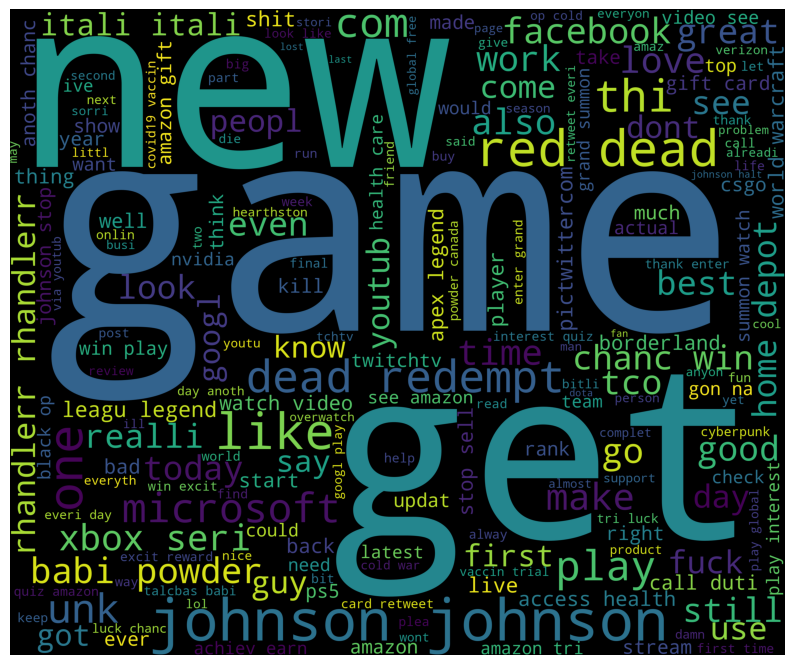

In [52]:
# Generate wordcloud for neutral sentiment
plt.figure(figsize=(10,10))

df_neu = df[df['sentiment']==0]
words = ' '.join(df_neu['message'])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word != 'RT'
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=3000,
                        height=2500
                         ).generate(cleaned_word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# BOW: Bag of Words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', ngram_range=(1,2))
X = cv.fit_transform(df['message'])
y = df['sentiment']

In [54]:
X

<59515x101317 sparse matrix of type '<class 'numpy.int64'>'
	with 945076 stored elements in Compressed Sparse Row format>

In [55]:
y

0      1
1      1
2      1
3      1
4      1
      ..
984   -1
985    0
988    0
989    1
991    0
Name: sentiment, Length: 59515, dtype: int64

In [56]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [69]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def classification_report_df(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    return df

# Show the predicted vs actual values
def predicted_vs_actual(y_true, y_pred):
    df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
    return df

# Naive Bayes

In [70]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [71]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = nb_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[4055  130  188]
 [ 278 3016  237]
 [ 300  116 3583]]


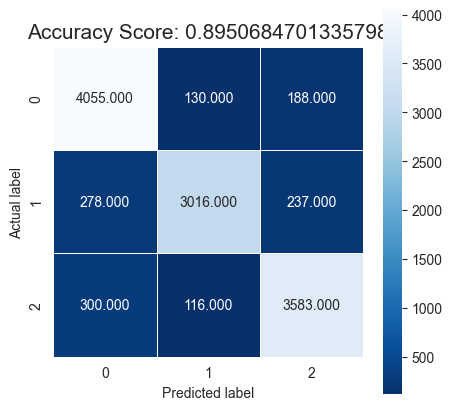

In [72]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.93      0.90      4373
           0       0.92      0.85      0.89      3531
           1       0.89      0.90      0.89      3999

    accuracy                           0.90     11903
   macro avg       0.90      0.89      0.89     11903
weighted avg       0.90      0.90      0.89     11903



In [74]:
accuracy(y_test, y_pred)

0.8950684701335798

In [75]:
predicted_vs_actual(y_test, y_pred)

,Actual,Predicted
45870,0,0
9850,1,1
11512,1,1
66532,1,1
69667,1,1
...,...,...
57921,-1,-1
47892,-1,-1
47524,1,1
19490,-1,1


In [76]:
# Testing the model
def predict_sentiment(text):
    text = remove_special_characters(text)
    text = clean_text(text)
    text = remove_stopwords(text)
    text = remove_short_words(text)
    text = stemming(text)
    text = lemmatization(text)
    text = word_tokenize(text)
    text = join_tokens(text)
    text = cv.transform([text])
    sentiment = nb_classifier.predict(text)
    if sentiment == 1:
        print('Positive')
    elif sentiment == -1:
        print('Negative')
    else:
        print('Neutral')

In [77]:
predict_sentiment('I am happy')

Positive


In [78]:
predict_sentiment('I am sad')

Negative


In [79]:
predict_sentiment('I am not happy')


Positive


# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

Text(0.5, 1.0, 'Confusion Matrix')

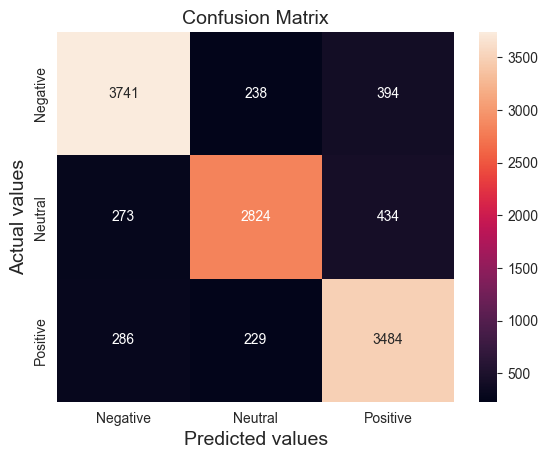

In [81]:
y_pred = dt_classifier.predict(X_test)
cf_mtx = confusion_matrix(y_test, y_pred)
category = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cf_mtx, annot=True, fmt='d', xticklabels=category, yticklabels=category)
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_percentage = ['{0:.2%}'.format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
# labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_percentage)]
# labels = np.asarray(labels).reshape(3,3)
# sns.heatmap(cf_mtx, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Actual values', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.87      0.86      0.86      4373
           0       0.86      0.80      0.83      3531
           1       0.81      0.87      0.84      3999

    accuracy                           0.84     11903
   macro avg       0.85      0.84      0.84     11903
weighted avg       0.85      0.84      0.84     11903



In [83]:
accuracy(y_test, y_pred)

0.8442409476602537

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Text(0.5, 1.0, 'Confusion Matrix')

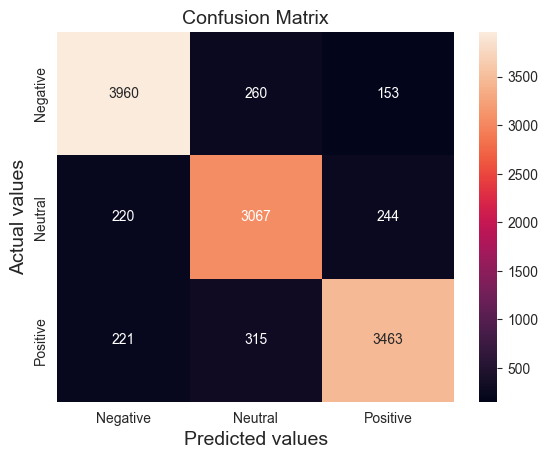

In [89]:
y_pred = lr_classifier.predict(X_test)
cf_mtx = confusion_matrix(y_test, y_pred)
category = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cf_mtx, annot=True, fmt='d', xticklabels=category, yticklabels=category)

plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Actual values', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.91      0.90      4373
           0       0.84      0.87      0.86      3531
           1       0.90      0.87      0.88      3999

    accuracy                           0.88     11903
   macro avg       0.88      0.88      0.88     11903
weighted avg       0.88      0.88      0.88     11903



In [91]:
accuracy(y_test, y_pred)

0.8812904309837856

In [ ]:
#n-gram of 4 words
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', ngram_range=(1,4))
X = cv.fit_transform(df['message'])
y = df['sentiment']

In [92]:
X

0                                  get borderland murder
1                                       come border kill
2                                    get borderland kill
3                                 come borderland murder
4                                  get borderland murder
                             ...                        
984    notic streamer watch play game battlefield rel...
985    6thman play red dead redempt shit bear start r...
988    suikoden alex kidd miracl world persona soul c...
989    thank match fund home depot payment 215545 gen...
991    late night stream boy come watch warzon run st...
Name: message, Length: 59515, dtype: object

In [93]:
y

0      1
1      1
2      1
3      1
4      1
      ..
984   -1
985    0
988    0
989    1
991    0
Name: sentiment, Length: 59515, dtype: int64

In [94]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [95]:
# Vectorizing the dataset
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
X_val = cv.transform(X_val)

In [96]:
# Training the model logistic regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)


C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Text(0.5, 1.0, 'Confusion Matrix')

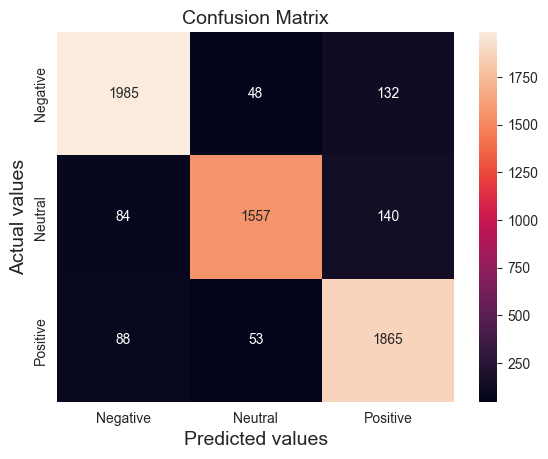

In [97]:
# Evaluating the model
y_pred = lr_classifier.predict(X_test)
cf_mtx = confusion_matrix(y_test, y_pred)
category = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cf_mtx, annot=True, fmt='d', xticklabels=category, yticklabels=category)

plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Actual values', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      2165
           0       0.94      0.87      0.91      1781
           1       0.87      0.93      0.90      2006

    accuracy                           0.91      5952
   macro avg       0.91      0.91      0.91      5952
weighted avg       0.91      0.91      0.91      5952



In [99]:
accuracy(y_test, y_pred)

0.9084341397849462

In [100]:
# Accuracy on validation set
y_pred = lr_classifier.predict(X_val)
accuracy(y_val, y_pred)

0.9052260124348849

# Part 2

In [84]:
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,get borderland kill
3,2401,Borderlands,1,come borderland murder
4,2401,Borderlands,1,get borderland murder


In [85]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df['message']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [86]:
# Vectorizing the dataset
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english', ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train)
print(X_train.shape)
print('No. of features: ', len(tfidf.get_feature_names()))

(47612, 90662)
No. of features:  90662


C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
X_test = tfidf.transform(X_test)
print(X_test.shape)

(11903, 90662)


## Function for model evaluation

In [62]:
def evaluate_model(model):
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('Accuracy: ', accuracy(y_test, y_pred))


## Naive Bayes

              precision    recall  f1-score   support

          -1       0.92      0.87      0.89      4373
           0       0.96      0.73      0.83      3531
           1       0.75      0.96      0.85      3999

    accuracy                           0.86     11903
   macro avg       0.88      0.85      0.86     11903
weighted avg       0.88      0.86      0.86     11903



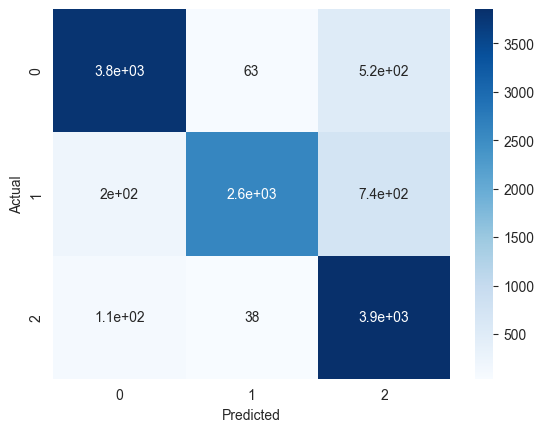

Accuracy:  0.859279173317651


In [67]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
evaluate_model(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

## Linear SVC

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      4373
           0       0.89      0.94      0.91      3531
           1       0.94      0.91      0.92      3999

    accuracy                           0.93     11903
   macro avg       0.93      0.93      0.93     11903
weighted avg       0.93      0.93      0.93     11903



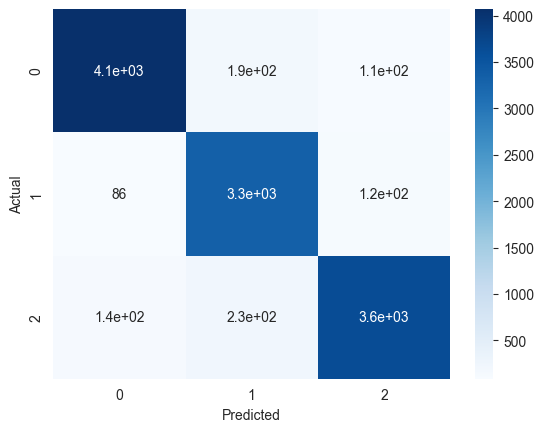

Accuracy:  0.9265731328236579


In [70]:
from sklearn.svm import LinearSVC
LSVCmodel = LinearSVC()
LSVCmodel.fit(X_train, y_train)
evaluate_model(LSVCmodel)
y_pred2 = LSVCmodel.predict(X_test)

In [71]:
# Testing the model
def predict_sentiment(text):
    text = remove_special_characters(text)
    text = clean_text(text)
    text = remove_stopwords(text)
    text = remove_short_words(text)
    text = stemming(text)
    text = lemmatization(text)
    text = word_tokenize(text)
    text = join_tokens(text)
    text = tfidf.transform([text])
    sentiment = LSVCmodel.predict(text)
    if sentiment == 1:
        print('Positive')
    elif sentiment == -1:
        print('Negative')
    else:
        print('Neutral')

In [72]:
predict_sentiment('I am happy')

Positive


In [73]:
predict_sentiment('I am sad')

Negative


In [74]:
predict_sentiment('I am not happy')

Positive


## Logistic Regression

C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.90      0.91      0.90      4373
           0       0.84      0.87      0.86      3531
           1       0.90      0.87      0.88      3999

    accuracy                           0.88     11903
   macro avg       0.88      0.88      0.88     11903
weighted avg       0.88      0.88      0.88     11903



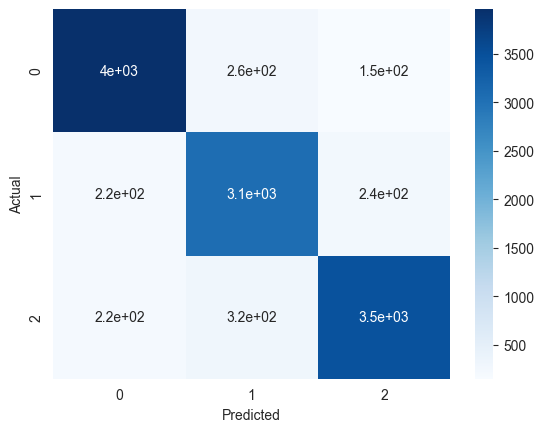

Accuracy:  0.8812904309837856


In [75]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
evaluate_model(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [76]:
# Testing the model
def predict_sentiment(text):
    text = remove_special_characters(text)
    text = clean_text(text)
    text = remove_stopwords(text)
    text = remove_short_words(text)
    text = stemming(text)
    text = lemmatization(text)
    text = word_tokenize(text)
    text = join_tokens(text)
    text = tfidf.transform([text])
    sentiment = LRmodel.predict(text)
    if sentiment == 1:
        print('Positive')
    elif sentiment == -1:
        print('Negative')
    else:
        print('Neutral')


In [77]:
predict_sentiment('I am happy')

Positive


In [78]:
predict_sentiment('I am sad')

Negative


In [79]:
predict_sentiment('I am not happy')

Positive


# LSTM

In [101]:
df.head()

,id,entity,sentiment,message
0,2401,Borderlands,1,get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,get borderland kill
3,2401,Borderlands,1,come borderland murder
4,2401,Borderlands,1,get borderland murder
